In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi_criterion(loadings):
    """
    calculate phi, without rotation.
    """
    p, k = loadings.shape
    h_i = np.sqrt(np.sum(loadings ** 2, axis=1))
    d = loadings / h_i[:,np.newaxis]
    d_means = np.sum(d ** 2, axis=0) / p
    phi = sum(sum((d[i,j] ** 2 - d_means[j]) ** 2 for i in range(p)) for j in range(k))
    return phi

In [11]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a[:,0] = [1,1,1]

a

array([[1, 2, 3],
       [1, 5, 6],
       [1, 8, 9]])

In [32]:
rotation_lambda = np.array([[0.628,0.372,0.9],
                            [0.696,0.313,0.9],
                            [0.899,-0.050,0],
                            [0.779,-0.201,0],
                            [0.728,-0.200,0]])
k = rotation_lambda.shape[1]
pairs = [(i,j) for i in range(k - 1) for j in range(k) if j > i]

phi_iterations = []
# Begin a cycle
for ccl in range(10):
    for i,j in pairs:
        # Pick out columns i,j and convert to k = 2 subproblem
        two_loadings_columns = np.array([rotation_lambda[:,i], rotation_lambda[:, j]]).T
        theta_range = np.linspace(0, np.pi / 2, 100)

        phis = []
        for theta_rad in theta_range:
            G = np.array([[np.cos(theta_rad) , np.sin(theta_rad)],
                          [-np.sin(theta_rad), np.cos(theta_rad)]])

            delta_two = two_loadings_columns @ G
            delta = rotation_lambda.copy()
            delta[:,i] = delta_two[:,0]
            delta[:,j] = delta_two[:,1]
            phis.append(phi_criterion(delta))


        theta_rad = theta_range[np.argmax(phis)] # Solution is given in a (1,) array


        # Rotate columns
        # theta_rad = np.deg2rad(theta)
        G = np.array([[np.cos(theta_rad) , np.sin(theta_rad)],
                    [-np.sin(theta_rad), np.cos(theta_rad)]])
        
        rotated_two_loadings = two_loadings_columns @ G

        # Replace old columns
        rotation_lambda[:,i] = rotated_two_loadings[:,0]
        rotation_lambda[:,j] = rotated_two_loadings[:,1]

        print("cycle:", ccl, 
              "theta:", np.rad2deg(theta_rad), 
              "pair:", (i,j), 
              "objective:", max(phis), 
              sep="\t")

        # Repeat
    phi_iterations.append(phi_criterion(rotation_lambda))

cycle:	0	theta:	24.545454545454547	pair:	(0, 1)	objective:	1.213788305574663
cycle:	0	theta:	11.818181818181818	pair:	(0, 2)	objective:	1.4313078364528244
cycle:	0	theta:	29.090909090909093	pair:	(1, 2)	objective:	1.7606551514152897
cycle:	1	theta:	84.54545454545455	pair:	(0, 1)	objective:	1.7758061933228484
cycle:	1	theta:	90.0	pair:	(0, 2)	objective:	1.7758061933228486
cycle:	1	theta:	0.0	pair:	(1, 2)	objective:	1.7758061933228486
cycle:	2	theta:	88.18181818181819	pair:	(0, 1)	objective:	1.7812032983236459
cycle:	2	theta:	0.0	pair:	(0, 2)	objective:	1.7812032983236459
cycle:	2	theta:	0.0	pair:	(1, 2)	objective:	1.7812032983236459
cycle:	3	theta:	0.0	pair:	(0, 1)	objective:	1.7812032983236459
cycle:	3	theta:	0.0	pair:	(0, 2)	objective:	1.7812032983236459
cycle:	3	theta:	0.0	pair:	(1, 2)	objective:	1.7812032983236459
cycle:	4	theta:	0.0	pair:	(0, 1)	objective:	1.7812032983236459
cycle:	4	theta:	0.0	pair:	(0, 2)	objective:	1.7812032983236459
cycle:	4	theta:	0.0	pair:	(1, 2)	objective:	1

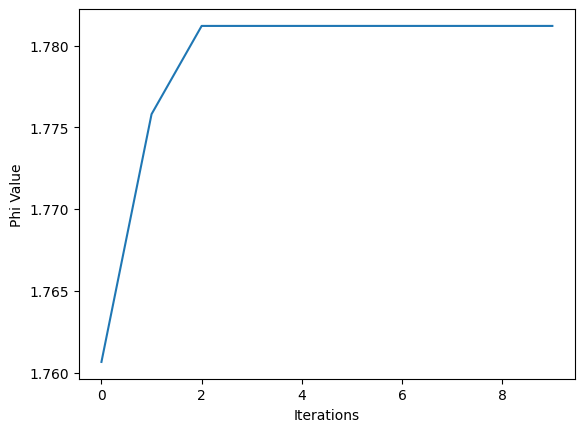

In [35]:
plt.ylabel("Phi Value")
plt.xlabel("Iterations")
plt.plot(phi_iterations)